<a href="https://colab.research.google.com/github/IrynaTkachenko/ai-experience/blob/main/linearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
from sklearn.linear_model import LinearRegression, Ridge,Lasso,LassoCV
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV,cross_val_predict,TimeSeriesSplit
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error

nomeArquivo = '/content/test.csv'
dataset = pd.read_csv(nomeArquivo,parse_dates=True)

pd.set_option('display.max_columns', None)
print(dataset.head())
print(dataset.columns)
print(dataset.info())

print(dataset.tail())

         Data Temperatura Media (C) Temperatura Minima (C)  \
0  2015-01-01                  27,3                   23,9   
1  2015-01-02                 27,02                   24,5   
2  2015-01-03                 24,82                   22,4   
3  2015-01-04                 23,98                   21,5   
4  2015-01-05                 23,82                     21   

  Temperatura Maxima (C) Precipitacao (mm)  Final de Semana  \
0                   32,5                 0              0.0   
1                   33,5                 0              0.0   
2                   29,9                 0              1.0   
3                   28,6               1,2              1.0   
4                   28,3                 0              0.0   

   Consumo de cerveja (litros)  
0                       25.461  
1                       28.972  
2                       30.814  
3                       29.799  
4                       28.900  
Index(['Data', 'Temperatura Media (C)', 'Temperatu

Text(0.5, 0.1, 'último: 2015-12-31')

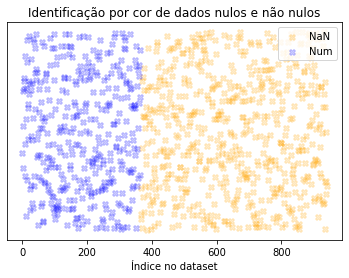

<Figure size 432x288 with 0 Axes>

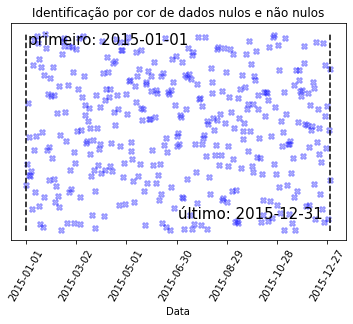

In [6]:
indicesNulos = dataset['Consumo de cerveja (litros)'].isna()
listaNaN = dataset[indicesNulos].index.tolist()
listaNum = dataset[~indicesNulos].index.tolist()

plt.figure(1)
plt.scatter(listaNaN,np.random.random(len(listaNaN))*2,marker='X',c='orange',alpha=0.2)
plt.scatter(listaNum,np.random.random(len(listaNum))*2,marker='X',c='b',alpha=0.2)
plt.xlabel('Índice no dataset')
plt.legend(['NaN','Num'],loc='upper right')
plt.tick_params(axis='y',which='both',left=False,bottom=False,labelleft=False)
plt.title('Ідентифікація кольорів нульових та ненульових даних')

plt.figure(2)
fig,ax = plt.subplots(1,1)
plt.scatter(dataset.iloc[listaNum,0],np.random.random(len(listaNum))*2,marker='X',c='b',alpha=0.3)
primeiroRegistroNum = dataset.iloc[listaNum[0],0]
ultimoRegistroNum = dataset.iloc[listaNum[-1],0]
plt.plot([primeiroRegistroNum,primeiroRegistroNum],[0,2],c='black',linestyle='--')
plt.plot([ultimoRegistroNum,ultimoRegistroNum],[0,2],c='black',linestyle='--')
plt.xlabel('Data')
plt.title('Ідентифікація кольорів нульових та ненульових даних')
plt.tick_params(axis='y',which='both',left=False,bottom=False,labelleft=False)
ax.xaxis.set_major_locator(MaxNLocator(8)) 
plt.tick_params(labelrotation=60)
ax.annotate('primeiro: {}'.format(dataset.iloc[listaNum[0],0]),xy=(0.05, 0.9), xycoords='axes fraction',fontsize=15)
ax.annotate('último: {}'.format(dataset.iloc[listaNum[-1],0]),xy=(0.50, 0.1), xycoords='axes fraction',fontsize=15)